# This example shows how to use the GFMM classifier using an improved online learning algorithm (IOL-GFMM)

Note that the numerical features in training and testing datasets must be in the range of [0, 1] because the GFMM classifiers require features in the unit cube.

## 1. Execute directly from the python file

In [1]:
%matplotlib notebook

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')

#### Get the path to the this jupyter notebook file

In [3]:
this_notebook_dir = os.path.dirname(os.path.abspath("__file__"))
this_notebook_dir

'C:\\hyperbox-brain\\examples\\numerical_data\\incremental_learner'

#### Get the home folder of the Hyperbox-Brain project

In [4]:
from pathlib import Path
project_dir = Path(this_notebook_dir).parent.parent.parent
project_dir

WindowsPath('C:/hyperbox-brain')

#### Create the path to the Python file containing the implementation of the GFMM classifier using the improved online learning algorithm

In [5]:
iol_gfmm_file_path = os.path.join(project_dir, Path("hbbrain/numerical_data/incremental_learner/iol_gfmm.py"))
iol_gfmm_file_path

'C:\\hyperbox-brain\\hbbrain\\numerical_data\\incremental_learner\\iol_gfmm.py'

#### Run the found file by showing the execution directions

In [6]:
!python "{iol_gfmm_file_path}" -h

usage: iol_gfmm.py [-h] -training_file TRAINING_FILE -testing_file
                   TESTING_FILE [--theta THETA] [--gamma GAMMA]
                   [--is_draw IS_DRAW]

The description of parameters

required arguments:
  -training_file TRAINING_FILE
                        A required argument for the path to training data file
                        (including file name)
  -testing_file TESTING_FILE
                        A required argument for the path to testing data file
                        (including file name)

optional arguments:
  --theta THETA         Maximum hyperbox size (in the range of (0, 1])
                        (default: 0.5)
  --gamma GAMMA         A sensitivity parameter describing the speed of
                        decreasing of the membership function in each
                        dimension (larger than 0) (default: 1)
  --is_draw IS_DRAW     Show the existing hyperboxes during the training
                        process on the screen (default: Fals

#### Create the path to training and testing datasets stored in the dataset folder

In [7]:
training_data_file = os.path.join(project_dir, Path("dataset/syn_num_train.csv"))
training_data_file

'C:\\hyperbox-brain\\dataset\\syn_num_train.csv'

In [8]:
testing_data_file = os.path.join(project_dir, Path("dataset/syn_num_test.csv"))
testing_data_file

'C:\\hyperbox-brain\\dataset\\syn_num_test.csv'

#### Run a demo program

In [9]:
!python "{iol_gfmm_file_path}" -training_file "{training_data_file}" -testing_file "{testing_data_file}" --theta 0.1 --gamma 1

Number of hyperboxes = 68
Testing accuracy (using a probability measure for samples on the boundary) =  87.20%


## 2. Using the GFMM classifier with IOL-GFMM algorithm through its init, fit, and predict functions

In [10]:
from hbbrain.numerical_data.incremental_learner.iol_gfmm import ImprovedOnlineGFMM
import pandas as pd

#### Create training and testing data sets

In [11]:
df_train = pd.read_csv(training_data_file, header=None)
df_test = pd.read_csv(testing_data_file, header=None)

Xy_train = df_train.to_numpy()
Xy_test = df_test.to_numpy()

Xtr = Xy_train[:, :-1]
ytr = Xy_train[:, -1]

Xtest = Xy_test[:, :-1]
ytest = Xy_test[:, -1]

#### Initializing parameters

In [12]:
theta = 0.1
gamma = 1
is_draw = True

### Training

<IPython.core.display.Javascript object>


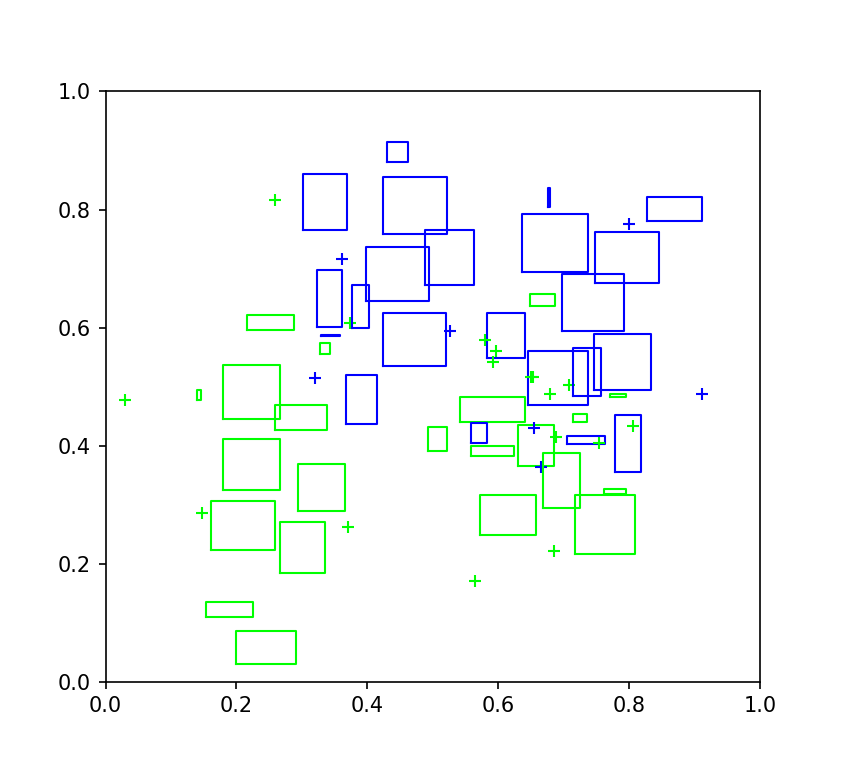

ImprovedOnlineGFMM(C=array([1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2,
       1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2]),
                   N_samples=array([11,  3,  2, 10,  5,  6,  6,  2,  7,  6,  3,  1,  7,  6,  2, 11,  1,
        5,  7,  2,  3,  9,  3,  4,  6,  9, 10,  5,  8, 13,  4,  4,  3,  3,
        6,  4,  2,  1,  2,  1,  1,  1,  2,  1,  2,  1,  1,  2,  1,  1,  1,
        5,  2,  1,  1,  6,  1,  5,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1]),
                   V=array([[0.42413, 0.5351...
       [0.52621 , 0.59493 ],
       [0.79935 , 0.7757  ],
       [0.6248  , 0.39922 ],
       [0.79516 , 0.32629 ],
       [0.66562 , 0.36352 ],
       [0.36057 , 0.71561 ],
       [0.72496 , 0.38674 ],
       [0.70743 , 0.50325 ],
       [0.40233 , 0.67232 ],
       [0.28822 , 0.62174 ],
       [0.14737 , 0.28498 ],
       [0.75421 , 0.40498 ],
       [0.59655 , 

In [13]:
iol_gfmm_clf = ImprovedOnlineGFMM(theta=theta, gamma=gamma, is_draw=is_draw)
iol_gfmm_clf.fit(Xtr, ytr)

#### The code below shows how to display decision boundaries among classes if input data are 2-dimensional

<IPython.core.display.Javascript object>


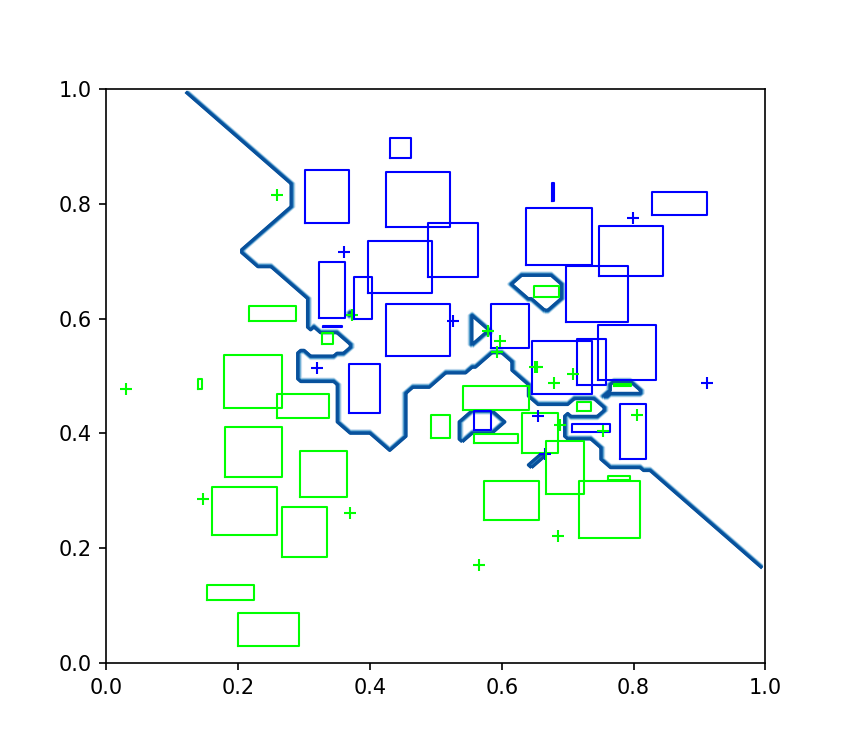

In [14]:
iol_gfmm_clf.draw_hyperbox_and_boundary("The trained GFMM classifier using IOL-GFMM and its decision boundaries")

In [15]:
print("Number of existing hyperboxes = %d"%(iol_gfmm_clf.get_n_hyperboxes()))

Number of existing hyperboxes = 68


### Prediction

In [16]:
from sklearn.metrics import accuracy_score

#### Predict the class label for input samples using a probability measure based on the number of samples included inside the winner hyperboxes for the samples located on the decision boundaries

In [17]:
y_pred = iol_gfmm_clf.predict(Xtest)
acc = accuracy_score(ytest, y_pred)
print(f'Accuracy = {acc * 100: .2f}%')

Accuracy =  87.20%


#### Predict the class label for input samples using Manhattan distance measure for the samples located on the decision boundaries

In [18]:
from hbbrain.constants import MANHATTAN_DIS
y_pred = iol_gfmm_clf.predict(Xtest, MANHATTAN_DIS)
acc = accuracy_score(ytest, y_pred)
print(f'Accuracy (Manhattan distance for samples on the decision boundaries) = {acc * 100: .2f}%')

Accuracy (Manhattan distance for samples on the decision boundaries) =  87.20%


#### Explaining the predicted result for the input sample by showing membership values and hyperboxes for each class

In [19]:
sample_need_explain = 10
y_pred_input_0, mem_val_classes, min_points_classes, max_points_classes = iol_gfmm_clf.get_sample_explanation(Xtest[sample_need_explain], Xtest[sample_need_explain])

In [20]:
print("Predicted class for sample X = [%f, %f] is %d and real class is %d" % (Xtest[sample_need_explain, 0], Xtest[sample_need_explain, 1], y_pred_input_0, ytest[sample_need_explain]))

Predicted class for sample X = [0.571640, 0.233700] is 2 and real class is 2


In [21]:
print("Membership values:")
for key, val in mem_val_classes.items():
    print("Class %d has the maximum membership value = %f" % (key, val))
    
for key in min_points_classes:
    print("Class %d has the representative hyperbox: V = %s and W = %s" % (key, min_points_classes[key], max_points_classes[key]))

Membership values:
Class 1 has the maximum membership value = 0.870180
Class 2 has the maximum membership value = 0.984660
Class 1 has the representative hyperbox: V = [0.66562 0.36352] and W = [0.66562 0.36352]
Class 2 has the representative hyperbox: V = [0.57285 0.24904] and W = [0.65695 0.31638]


### Show input sample and hyperboxes belonging to each class. In 2D, we can show rectangles or use parallel coordinates. For 4 or more dimensions, parallel coordinates should be used

#### Using rectangles to show explanations

<IPython.core.display.Javascript object>


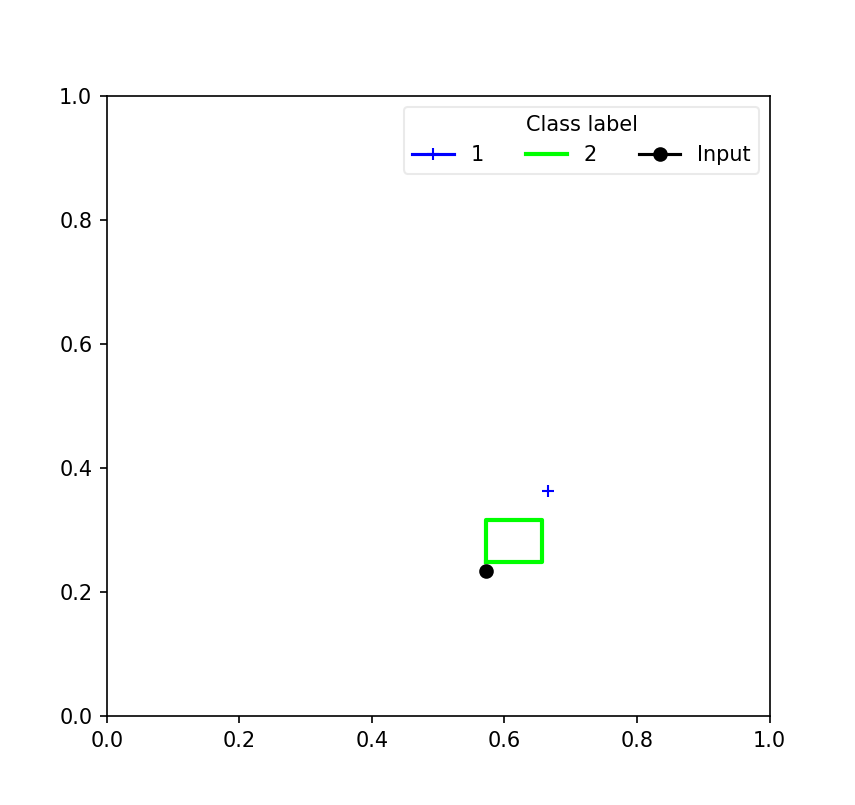

In [22]:
iol_gfmm_clf.show_sample_explanation(Xtest[sample_need_explain], Xtest[sample_need_explain], min_points_classes, max_points_classes, y_pred_input_0, "2D")

#### Using parallel coordinates. This mode best fits for any dimensions

In [23]:
# Create the parallel coordinates graph
iol_gfmm_clf.show_sample_explanation(Xtest[sample_need_explain], Xtest[sample_need_explain], min_points_classes, max_points_classes, y_pred_input_0, file_path="iframe_figures/iol_gfmm_par_cord.html")

In [24]:
# Load the result to show on the notebook
from IPython.display import IFrame
IFrame('iframe_figures/iol_gfmm_par_cord.html', width=820, height=500)